In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder , OneHotEncoder  , StandardScaler , RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , BernoulliNB , CategoricalNB , MultinomialNB , ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split , KFold
from imblearn.over_sampling import SMOTE

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.drop('id' , axis = 1 , inplace = True)

In [8]:
df.isna().sum().sort_values(ascending=False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [10]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [13]:
df.drop('smoking_status' , axis = 1 , inplace = True)

In [14]:
#df = df[df['gender']!='Other']
#df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0}).astype(int)
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(int)
#df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0}).astype(int)
#df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': np.nan}).astype(float)

<p style = "font-size : 30px; color : #ebe4d6; font-family : 'Comic Sans MS'; text-align : center; background-color : #906472; border-radius: 5px 5px;"><strong>Data visualization</strong></p>

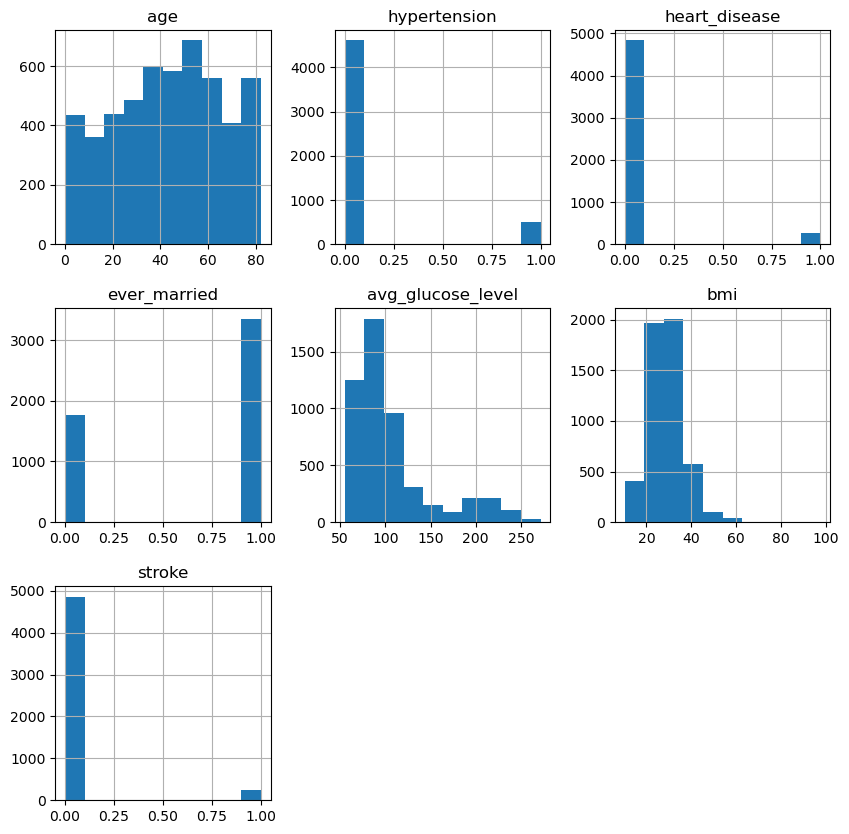

In [15]:
df.hist(figsize= (10 , 10))
plt.show()

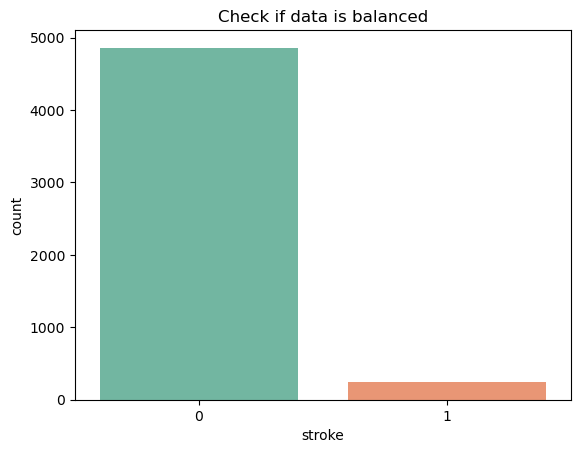

In [16]:
sns.countplot(data = df , x='stroke' ,  palette = 'Set2')
plt.title("Check if data is balanced")
plt.show()

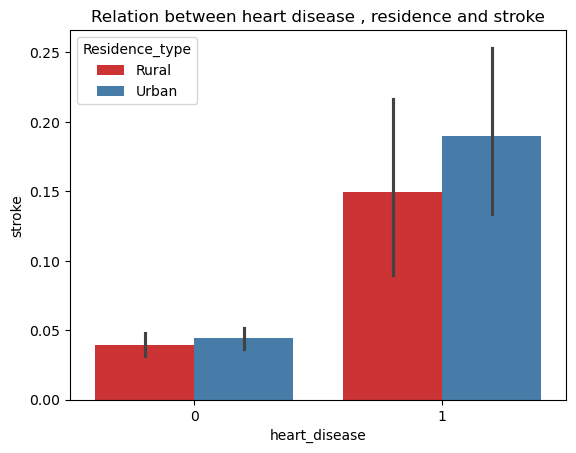

In [17]:
sns.barplot(data = df , x='heart_disease' , y = 'stroke' , hue ='Residence_type' , palette = 'Set1')
plt.title('Relation between heart disease , residence and stroke')
plt.show()

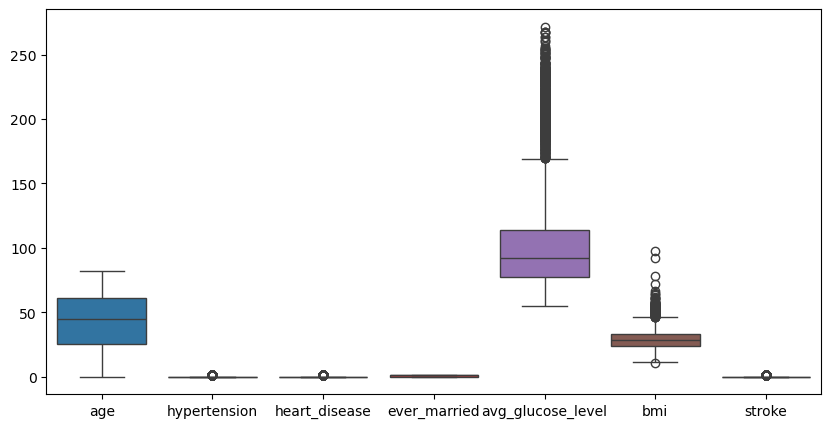

In [18]:
plt.figure(figsize=(10 , 5))
sns.boxplot(data = df)
plt.show("Checking if there is outliers")
plt.show()

<Axes: >

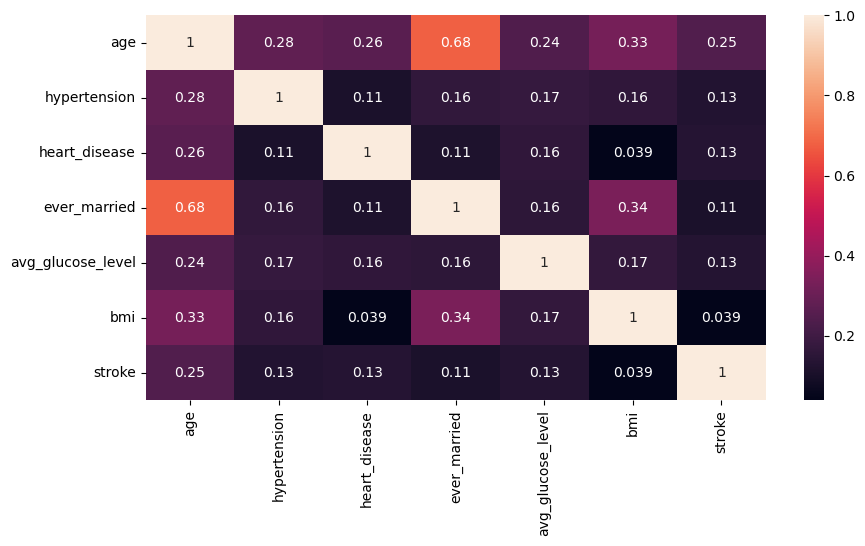

In [19]:
plt.figure(figsize=(10 , 5))
sns.heatmap(df.corr(numeric_only = True) , annot=True)

<p style = "font-size : 30px; color : #ebe4d6; font-family : 'Comic Sans MS'; text-align : center; background-color : #906472; border-radius: 5px 5px;"><strong>Encoding</strong></p>

In [20]:
cols = df.select_dtypes('object').nunique().sort_values(ascending=False).index
cols

Index(['work_type', 'gender', 'Residence_type'], dtype='object')

In [21]:
for col in cols:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])

In [22]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1


<p style = "font-size : 30px; color : #ebe4d6; font-family : 'Comic Sans MS'; text-align : center; background-color : #906472; border-radius: 5px 5px;"><strong>Splitting and scaling</strong></p>

In [23]:
X = df.drop('stroke' , axis=1) 
y = df['stroke']

In [24]:
y.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<p style = "font-size : 30px; color : #ebe4d6; font-family : 'Comic Sans MS'; text-align : center; background-color : #906472; border-radius: 5px 5px;"><strong>Models</strong></p>

In [25]:
scaler = RobustScaler()

<p style = "font-size : 30px; color : #ebe4d6; font-family : 'Comic Sans MS'; text-align : center; background-color : #906472; border-radius: 5px 5px;"><strong>Before oversampling</strong></p>

In [26]:
X = scaler.fit_transform(X)

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=42)

In [28]:
models = { 'Logistic Regression': LogisticRegression(max_iter=1000), 
            'DT' : DecisionTreeClassifier(criterion='log_loss' , max_depth=50),
            'RF': RandomForestClassifier(n_estimators=20 , criterion='log_loss' , max_depth=50),
            'KNN' : KNeighborsClassifier(n_neighbors= 3),
            'NB' : GaussianNB(),
            'SVM' : SVC(kernel= 'rbf' , C=.01 , gamma=.01)
            }

In [29]:
Acc = []
Precision = []
Recall = []
F1score = []
conv = {}

In [30]:
for k, v in models.items():
    v.fit(X_train , y_train)
    y_pred = v.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred ))
    F1score.append(f1_score(y_test, y_pred))
    conv[k] = confusion_matrix(y_test, y_pred)
    print('Finished')

Finished
Finished
Finished
Finished
Finished
Finished


In [31]:
Result = pd.DataFrame({'Models' : models.keys(), 'Accuracy': Acc , 'Precision': Precision , 'Recall': Recall ,'F1score': F1score}  )

In [32]:
Result.sort_values(by='F1score' , ascending=False).style.background_gradient(cmap='BuPu')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<p style = "font-size : 30px; color : #ebe4d6; font-family : 'Comic Sans MS'; text-align : center; background-color : #906472; border-radius: 5px 5px;"><strong>After oversampling</strong></p>

In [32]:
sm=SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [33]:
X = scaler.fit_transform(X)

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=42)

In [35]:
models = { 'Logistic Regression': LogisticRegression(max_iter=1000), 
            'DT' : DecisionTreeClassifier(criterion='log_loss' , max_depth=50),
            'RF': RandomForestClassifier(n_estimators=20 , criterion='log_loss' , max_depth=50),
            'KNN' : KNeighborsClassifier(n_neighbors= 3),
            'NB' : GaussianNB(),
            'SVM' : SVC(kernel= 'rbf' , C=.01 , gamma=.01)
            }

In [36]:
Acc = []
Precision = []
Recall = []
F1score = []
conv = {}

In [37]:
for k, v in models.items():
    v.fit(X_train , y_train)
    y_pred = v.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred ))
    F1score.append(f1_score(y_test, y_pred))
    conv[k] = confusion_matrix(y_test, y_pred)
    print('Finished')

Finished
Finished
Finished
Finished
Finished
Finished


In [38]:
Result = pd.DataFrame({'Models' : models.keys(), 'Accuracy': Acc , 'Precision': Precision , 'Recall': Recall ,'F1score': F1score}  )

In [39]:
Result.sort_values(by='F1score' , ascending=False).style.background_gradient(cmap='BuPu')

,Models,Accuracy,Precision,Recall,F1score
2,RF,0.938817,0.928499,0.950515,0.939379
1,DT,0.934704,0.933196,0.936082,0.934637
3,KNN,0.907969,0.859873,0.974227,0.913485
0,Logistic Regression,0.777378,0.753541,0.822680,0.786594
5,SVM,0.726478,0.652083,0.968041,0.779253
4,NB,0.761440,0.725893,0.838144,0.777990


In [40]:
Higher_model = Result.sort_values(by='F1score' , ascending=False).head(1)['Models'].reset_index(drop=True)[0]

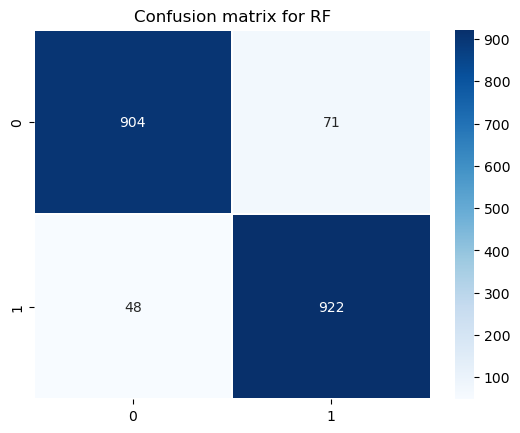

In [41]:
sns.heatmap(conv[Higher_model], annot=True , cmap='Blues' , linewidths = 0.01 , fmt='g')
plt.title(f"Confusion matrix for {Higher_model}")
plt.show()

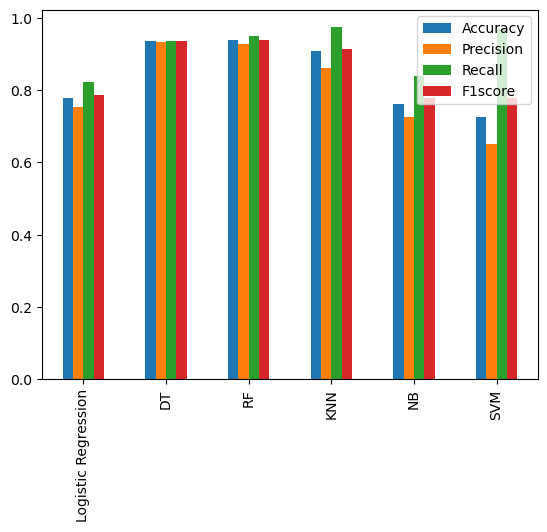

In [42]:
Result.plot.bar()
plt.xticks(ticks=range(len(Result)), labels=Result['Models'])
plt.show()

In [39]:
model = keras.Sequential()
model.add(keras.layers.Dense(64,  activation="relu", input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [40]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2)

Epoch 1/300
52/52 [==============================] - 1s 5ms/step - loss: 0.4500 - accuracy: 0.8853 - val_loss: 0.2681 - val_accuracy: 0.9548
Epoch 2/300
52/52 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9541 - val_loss: 0.1880 - val_accuracy: 0.9548
Epoch 3/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9541 - val_loss: 0.1696 - val_accuracy: 0.9548
Epoch 4/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9541 - val_loss: 0.1617 - val_accuracy: 0.9548
Epoch 5/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9541 - val_loss: 0.1581 - val_accuracy: 0.9548
Epoch 6/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9541 - val_loss: 0.1551 - val_accuracy: 0.9548
Epoch 7/300
52/52 [==============================] - 0s 2ms/step - loss: 0.1558 - accuracy: 0.9541 - val_loss: 0.1528 - val_accuracy: 0.9548
Epoch 8/300
5

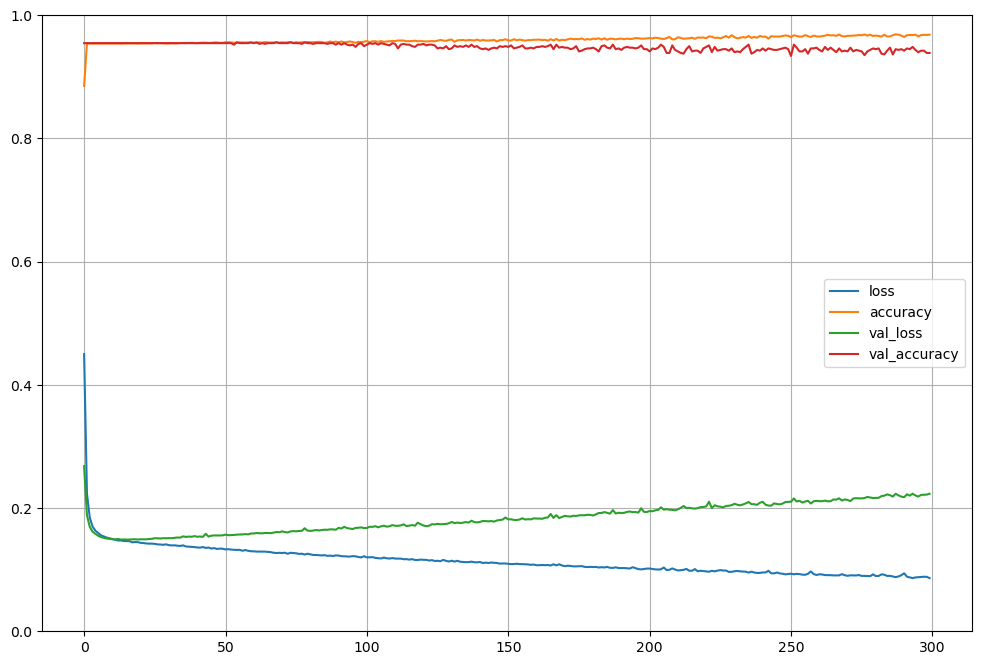

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [42]:
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.9286
Loss     :  0.2818990647792816
accuracy :  0.9285714030265808


In [43]:
class_names = ["0", "1"]
print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



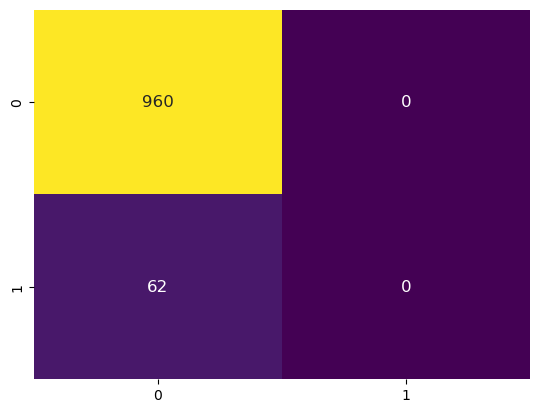

In [44]:
conf_matx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
plt.show()